# Houses in London

Dataset Reflecting the Features and Market Values of Houses in London  
Dataset que Refleja las Características y Valores de Mercado de Casas en Londres

---

### About Dataset / Sobre el Dataset
This dataset contains various characteristics and price information about houses in London. Consisting of 1000 entries, it reflects many aspects of each house, from location to interior design. In addition to physical features such as the address, neighborhood, number of rooms, and square footage, it also includes more specific details like the age of the building, garage availability, and balcony presence. Furthermore, the price of each house provides valuable insights into its market value.

Este dataset contiene diversas características e información de precios sobre casas en Londres. Compuesto por 1000 entradas, refleja muchos aspectos de cada casa, desde la ubicación hasta el diseño interior. Además de características físicas como la dirección, el vecindario, el número de habitaciones y los metros cuadrados, también incluye detalles más específicos como la antigüedad del edificio, la disponibilidad de garaje y la presencia de balcón. Además, el precio de cada casa proporciona información valiosa sobre su valor de mercado.

---

| Column / Columna | Data / Dato |
|--------|-------------------------|
| Address | The address of the house / La dirección de la casa. |
| Neighborhood | The neighborhood or district where the house is located / El vecindario o distrito donde se ubica la casa. |
| Bedrooms | The number of bedrooms / Número de dormitorios. |
| Bathrooms | The number of bathrooms / Número de baños. |
| Square Meters | The total size of the house in square meters / Tamaño total de la casa en metros cuadrados. |
| Building Age | The age of the building / Antigüedad del edificio. |
| Garden | Whether the house has a garden ("Yes" or "No") / Si la casa tiene jardín ("Yes" o "No"). |
| Garage | Whether the house has a garage ("Yes" or "No") / Si la casa tiene garaje ("Yes" o "No"). |
| Floors | The total number of floors / Número total de pisos. |
| Property Type | The type of property / Tipo de propiedad. |
| Heating Type | The type of heating system / Tipo de sistema de calefacción. |
| Balcony | Whether the house has a balcony ("Yes" or "No") / Si la casa tiene balcón. |
| Interior Style | The interior design style / Estilo de diseño interior. |
| View | The type of view from the house / Tipo de vista desde la casa. |
| Materials | The materials used in construction / Materiales usados en la construcción. |
| Building Status | The current condition of the building / Condición actual del edificio. |
| Price (£) | The sale price in British pounds / Precio de venta en libras esterlinas. |


[Link in the source "Kaggle"](https://www.kaggle.com/datasets/oktayrdeki/houses-in-london)

---


### Project Mission / Misión del Proyecto
Unsupervised learning will be applied despite the availability of the price (dependent or target variable). Our mission is to implement various methods and compare them with the final results. This is strictly a training exercise.

Se aplicará aprendizaje no supervisado a pesar de la disponibilidad del precio (variable dependiente u objetivo). Nuestra misión es implementar varios métodos y comparar sus resultados finales. Este es estrictamente un ejercicio de entrenamiento.

---


In [3]:
# Libraries / Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load dataset / Cargar dataset
df = pd.read_csv("london_houses.csv")
df.head()


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [5]:
# General info / Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [6]:
df["Balcony"].unique()

array(['High-level Balcony', 'No Balcony', 'Low-level Balcony'],
      dtype=object)

### Preprocessing / Preprocesamiento
Dropping string columns, binary mapping, ordinal encoding, and One-Hot encoding the rest of the categorical features.  
Eliminando columnas de texto, mapeo binario, encoding ordinal y One-Hot encoding para el resto de las variables categóricas.


In [7]:
# 1. Save target before touching anything / Guardamos el target antes de tocar nada
df_target = df['Price (£)'].copy()

# 2. Drop useless columns / Drop columnas inútiles
df_model = df.drop(['Address', 'Price (£)'], axis=1)

# 3. Binary Yes/No → 0/1 / Binarias Yes/No → 0/1
binary_cols = ['Garden', 'Garage']
for col in binary_cols:
    df_model[col] = df_model[col].map({'Yes': 1, 'No': 0})

# 4. Ordinal encoding (manual) / Encoding ordinal (manual)
df_model['Balcony'] = df_model['Balcony'].map({
    'No Balcony': 0,
    'Low-level Balcony': 1,
    'High-level Balcony': 2
})

df_model['Building Status'] = df_model['Building Status'].map({
    'Old': 0,
    'Renovated': 1,
    'New': 2
})

# 5. Nominal → One-Hot Encoding / Nominales → One-Hot Encoding
nominal_cols = ['Neighborhood', 'Property Type', 'Heating Type',
                'Interior Style', 'View', 'Materials']
df_model = pd.get_dummies(df_model, columns=nominal_cols, drop_first=False)

print(df_model.shape)
df_model.info()


(1000, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Bedrooms                         1000 non-null   int64
 1   Bathrooms                        1000 non-null   int64
 2   Square Meters                    1000 non-null   int64
 3   Building Age                     1000 non-null   int64
 4   Garden                           1000 non-null   int64
 5   Garage                           1000 non-null   int64
 6   Floors                           1000 non-null   int64
 7   Balcony                          1000 non-null   int64
 8   Building Status                  1000 non-null   int64
 9   Neighborhood_Camden              1000 non-null   bool 
 10  Neighborhood_Chelsea             1000 non-null   bool 
 11  Neighborhood_Greenwich           1000 non-null   bool 
 12  Neighborhood_Islington           1000 

In [8]:
# Convertir bool → int
df_model = df_model.astype({col: int for col in df_model.select_dtypes('bool').columns})

---
#### Feature Scaling / Escalado de Features
The data will be transformed to achieve zero mean (μ = 0) and unit variance (σ = 1).  
Los datos serán transformados para obtener media cero (μ = 0) y varianza unitaria (σ = 1).

$$z = \\frac{x - \\mu}{\\sigma}$$

Where / Donde:
- $\\mu$: Mean / Media.
- $\\sigma$: Standard Deviation / Desviación Estándar.
- $x$: Original Value / Valor Original.
- $z$: Scaled Value / Valor Escalado.

---
> "Since this is an unsupervised learning task (Clustering), a train-test split is not required. The goal is to identify underlying patterns within the entire dataset."  
> "Dado que esta es una tarea de aprendizaje no supervisado (Clustering), no se requiere división train-test. El objetivo es identificar patrones subyacentes en todo el dataset."

---


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

print("Shape:", scaled_data.shape)
print("Media (primeras 3 cols):", scaled_data[:, :3].mean(axis=0).round(4))
print("Std (primeras 3 cols):",   scaled_data[:, :3].std(axis=0).round(4))

Shape: (1000, 39)
Media (primeras 3 cols): [ 0. -0. -0.]
Std (primeras 3 cols): [1. 1. 1.]


#### Finding the Optimal Number of Clusters (K) / Encontrando el Número Óptimo de Clusters (K)

Before running an algorithm like K-Means, you need to decide how many clusters to use. The Elbow Method is the standard way to do this by plotting the Within-Cluster Sum of Squares (WCSS).  
Antes de ejecutar un algoritmo como K-Means, es necesario decidir cuántos clusters usar. El Elbow Method es la forma estándar de hacer esto graficando la Suma de Cuadrados Dentro del Cluster (WCSS).


C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

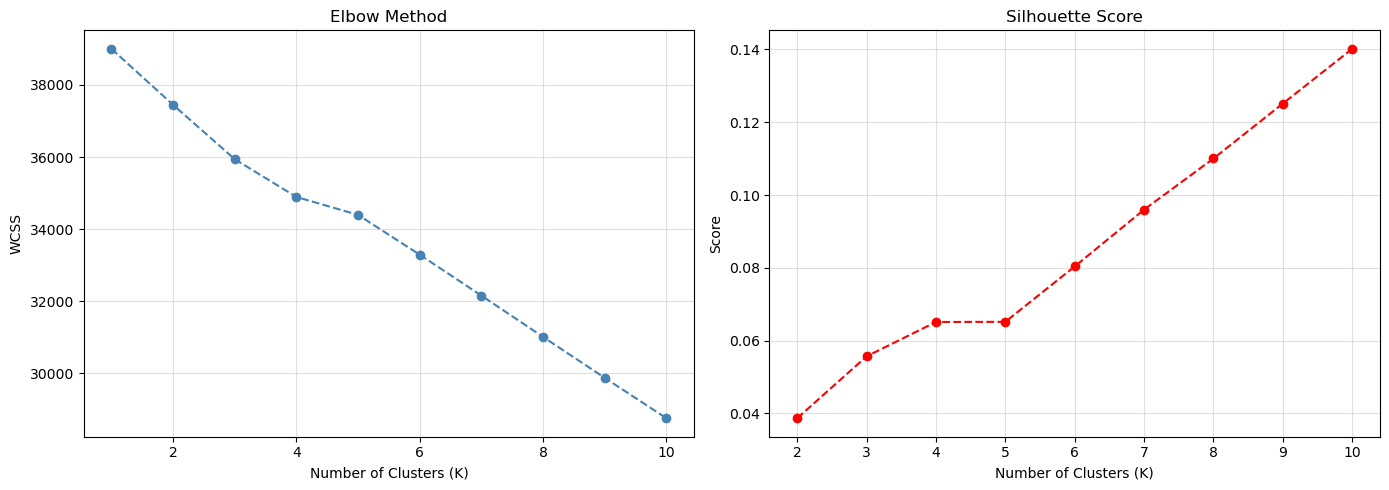

Mejor K según Silhouette: 10  (score: 0.1402)


In [10]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- Elbow Method ---
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

# --- Silhouette Score ---
sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, labels))

# --- Side by side plot / Plot lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, 11), wcss, marker='o', linestyle='--', color='steelblue')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('WCSS')
axes[0].grid(alpha=0.4)

axes[1].plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='red')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Score')
axes[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()

# Best K by silhouette / Mejor K según Silhouette
best_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f"Best K / Mejor K: {best_k}  (score: {max(sil_scores):.4f})")


````python 
import sys
!{sys.executable} -m pip install kneed 
````

In [13]:
# pip install kneed
from kneed import KneeLocator

knee = KneeLocator(
    range(1, 11), 
    wcss, 
    curve='convex', 
    direction='decreasing'
)

print(f"Codo detectado en K = {knee.knee}")

# Marcarlo en el plot
axes[0].axvline(x=knee.knee, color='orange', linestyle=':', label=f'Codo K={knee.knee}')
axes[0].legend()

Codo detectado en K = None


TypeError: '>' not supported between instances of 'float' and 'NoneType'

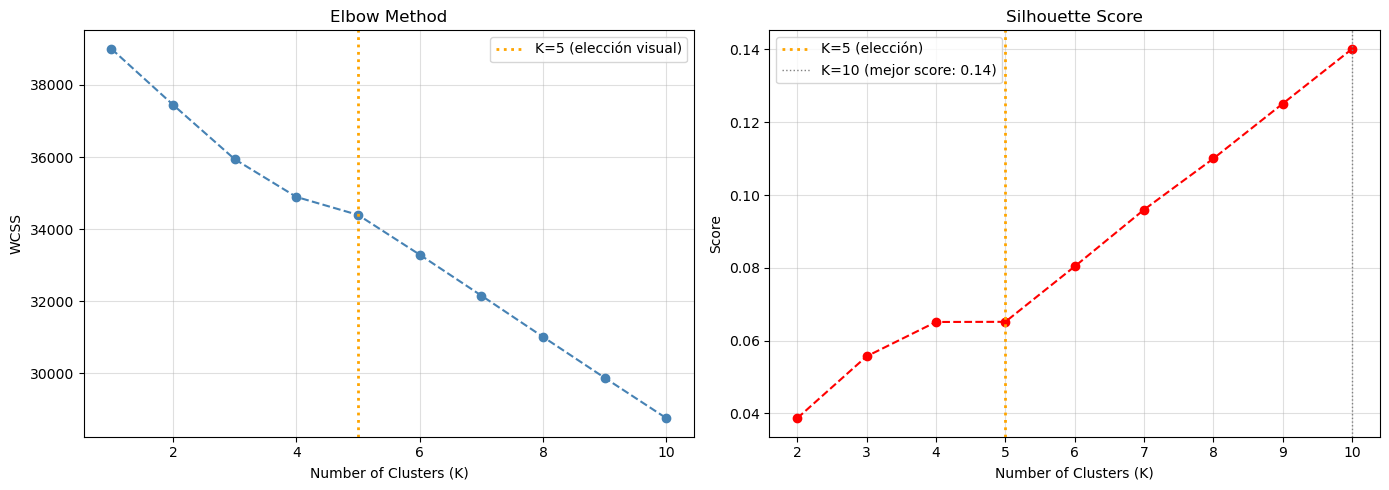

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, 11), wcss, marker='o', linestyle='--', color='steelblue')
axes[0].axvline(x=5, color='orange', linestyle=':', linewidth=2, label='K=5 (elección visual)')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('WCSS')
axes[0].legend()
axes[0].grid(alpha=0.4)

axes[1].plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='red')
axes[1].axvline(x=5, color='orange', linestyle=':', linewidth=2, label='K=5 (elección)')
axes[1].axvline(x=10, color='gray', linestyle=':', linewidth=1, label=f'K=10 (mejor score: {max(sil_scores):.2f})')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Score')
axes[1].legend()
axes[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()


### Elección de K / Choosing K

Neither the Elbow Method (no elbow automatically detectable) nor the Silhouette Score 
(maximum at K=10 with a weak score of 0.14) provide a definitive answer.

This indicates that the dataset does not have strongly pronounced natural clusters.

**Decision: K=5** — chosen for interpretability. With 5 groups we can identify 
meaningful market segments (e.g. budget, mid-range, premium housing, etc.) 
without losing legibility in the subsequent analysis.

---

### Elección de K

Ni el Elbow Method (codo no detectable automáticamente) ni el Silhouette Score 
(máximo en K=10 con score débil de 0.14) ofrecen una respuesta contundente.

Esto indica que el dataset no tiene clusters naturales muy pronunciados.

**Decisión: K=5** — elegido por interpretabilidad. Con 5 grupos podemos 
identificar segmentos de mercado significativos (ej. vivienda económica, 
media, premium, etc.) sin perder legibilidad en el análisis posterior.

---

### Silhouette Score — Escala de Interpretación / Interpretation Scale

| Score | Español | English |
|-------|---------|---------|
| 0.71 – 1.00 | Clusters perfectamente separados | Perfectly separated clusters |
| 0.51 – 0.70 | Estructura razonable | Reasonable structure |
| 0.26 – 0.50 | Estructura débil, clusters se solapan | Weak structure, overlapping clusters |
| < 0.25 | Sin estructura clara, clusters artificiales | No clear structure, artificial clusters |

> **Nuestro resultado / Our result: 0.14** → Sin estructura clara / No clear structure.

---

In [15]:
# Train with K=5 and K=10 / Entrenamiento con K=5 y K=10
kmeans_5 = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans_10 = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)

df['Cluster_5'] = kmeans_5.fit_predict(scaled_data)
df['Cluster_10'] = kmeans_10.fit_predict(scaled_data)

# Distribution of houses per cluster / Distribución de casas por cluster
print("=== K=5 ===")
print(df['Cluster_5'].value_counts().sort_index())
print()
print("=== K=10 ===")
print(df['Cluster_10'].value_counts().sort_index())


C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


=== K=5 ===
Cluster_5
0    292
1    113
2    385
3    114
4     96
Name: count, dtype: int64

=== K=10 ===
Cluster_10
0     94
1    106
2     96
3     89
4     96
5     97
6     97
7     98
8    114
9    113
Name: count, dtype: int64


---

### Distribución de Casas por Cluster / Houses Distribution per Cluster

#### K=5
| Cluster | Casas / Houses | Ideal | Diferencia / Difference |
|---------|---------------|-------|------------------------|
| 0 | 292 | 200 | +92 |
| 1 | 113 | 200 | -87 |
| 2 | 385 | 200 | +185 ⚠️ |
| 3 | 114 | 200 | -86 |
| 4 |  96 | 200 | -104 |

> ❌ **Muy desbalanceado / Highly unbalanced** — El cluster 2 absorbe el 38% del total.
> The cluster 2 absorbs 38% of all houses.

---

#### K=10
| Cluster | Casas / Houses | Ideal | Diferencia / Difference |
|---------|---------------|-------|------------------------|
| 0 |  94 | 100 | -6  |
| 1 | 106 | 100 | +6  |
| 2 |  96 | 100 | -4  |
| 3 |  89 | 100 | -11 |
| 4 |  96 | 100 | -4  |
| 5 |  97 | 100 | -3  |
| 6 |  97 | 100 | -3  |
| 7 |  98 | 100 | -2  |
| 8 | 114 | 100 | +14 |
| 9 | 113 | 100 | +13 |

> ✅ **Bien balanceado / Well balanced** — Todos los clusters cerca de 100.
> All clusters close to the ideal of 100 houses.

---

### Conclusión / Conclusion

Con 1000 casas, el número ideal por cluster es **1000 ÷ K**.
With 1000 houses, the ideal number per cluster is **1000 ÷ K**.

K=10 cumple este criterio y también obtiene el mejor Silhouette Score (0.14).
K=10 meets this criterion and also achieves the best Silhouette Score (0.14).

**Decisión final / Final decision: K=10** ✅

---

               Price (£)                          Square Meters Building Age
                Promedio    Mediana    Desv. Est.      Promedio     Promedio
Cluster_10                                                                  
0           2.452894e+06  2485333.0  1.003020e+06    147.691489    51.170213
1           1.626332e+06  1676999.0  6.408124e+05    150.707547    47.905660
2           1.957589e+06  1874666.5  8.404570e+05    146.177083    51.541667
3           1.332829e+06  1290666.0  5.994102e+05    149.764045    50.044944
4           1.781121e+06  1702400.0  7.366677e+05    153.510417    46.593750
5           1.507373e+06  1452000.0  6.127982e+05    150.989691    53.969072
6           1.269409e+06  1248000.0  5.651061e+05    152.206186    45.092784
7           2.291437e+06  2248200.0  1.047460e+06    150.581633    52.704082
8           2.282233e+06  2234400.0  9.183999e+05    148.885965    48.482456
9           1.824982e+06  1875000.0  7.778905e+05    146.283186    52.221239

C:\Users\se_ba\AppData\Local\Temp\ipykernel_19320\858718305.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_10', y='Price (£)', data=df, palette='viridis')


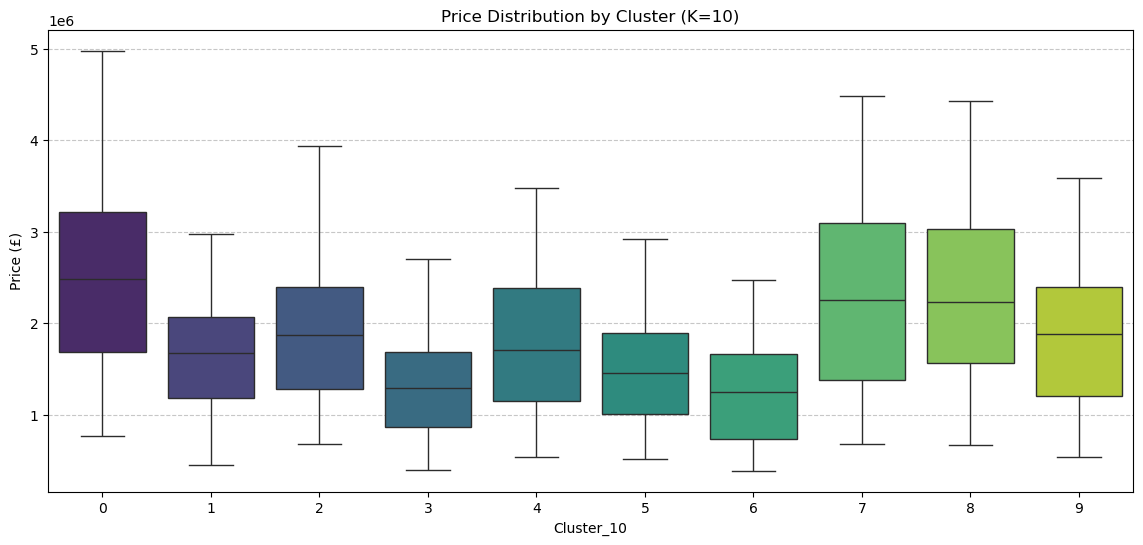

C:\Users\se_ba\AppData\Local\Temp\ipykernel_19320\858718305.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Cluster_10', y='Price (£)', data=df, jitter=True, palette='viridis', alpha=0.6)


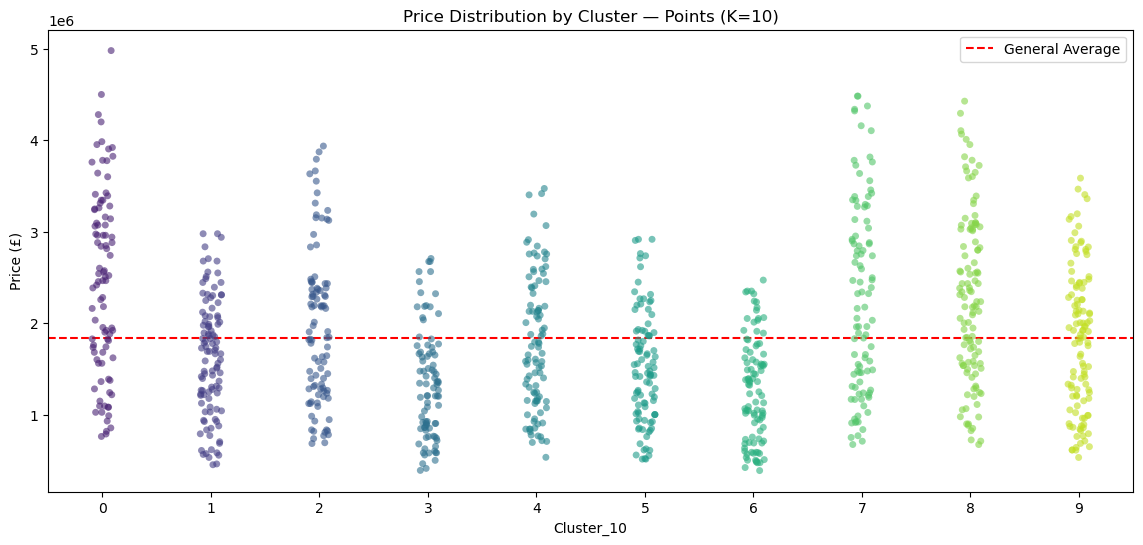

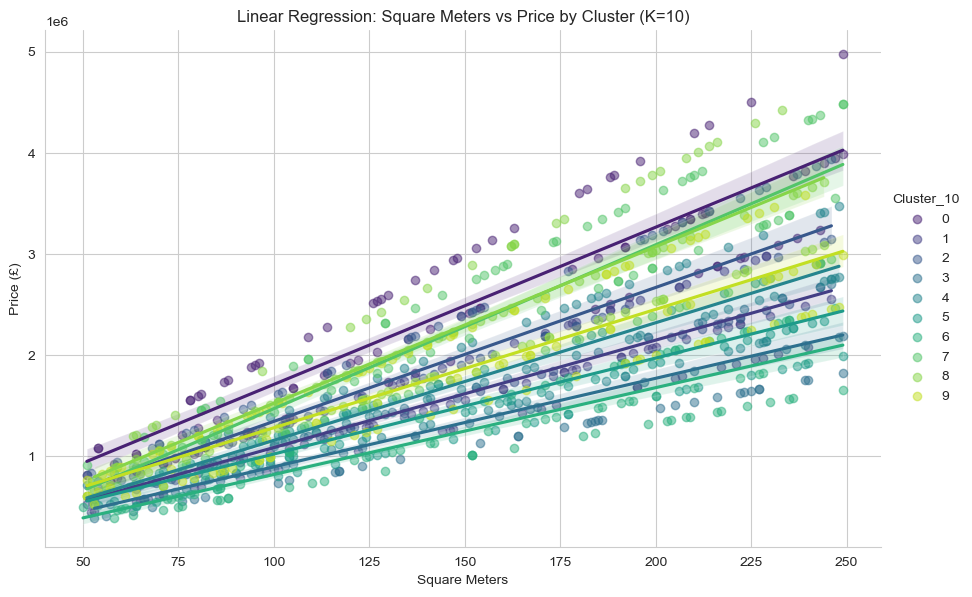

In [16]:
# Analysis by cluster / Análisis por cluster
analisis_clusters = df.groupby('Cluster_10').agg({
    'Price (£)': ['mean', 'median', 'std'],
    'Square Meters': 'mean',
    'Building Age': 'mean'
}).rename(columns={'mean': 'Promedio', 'median': 'Mediana', 'std': 'Desv. Est.'})
print(analisis_clusters)

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster_10', y='Price (£)', data=df, palette='viridis')
plt.title('Price Distribution by Cluster (K=10)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Stripplot
plt.figure(figsize=(14, 6))
sns.stripplot(x='Cluster_10', y='Price (£)', data=df, jitter=True, palette='viridis', alpha=0.6)
plt.title('Price Distribution by Cluster — Points (K=10)')
plt.axhline(df['Price (£)'].mean(), color='red', linestyle='--', label='General Average')
plt.legend()
plt.show()

# lmplot — Linear Regression per cluster / Regresión lineal por cluster
sns.set_style("whitegrid")
g = sns.lmplot(
    data=df,
    x="Square Meters", 
    y="Price (£)", 
    hue="Cluster_10", 
    palette="viridis",
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha':0.5}
)
g.set_axis_labels("Square Meters", "Price (£)")
plt.title("Linear Regression: Square Meters vs Price by Cluster (K=10)")
plt.show()


In [17]:
# Average price by neighborhood / Precio promedio por vecindario
print(df.groupby('Neighborhood')['Price (£)'].mean().sort_values(ascending=False))


Neighborhood
Chelsea         2.452894e+06
Westminster     2.291437e+06
Kensington      2.282233e+06
Notting Hill    1.957589e+06
Marylebone      1.824982e+06
Soho            1.781121e+06
Camden          1.626332e+06
Islington       1.507373e+06
Shoreditch      1.332829e+06
Greenwich       1.269409e+06
Name: Price (£), dtype: float64


In [18]:
# Cross Cluster_10 with Neighborhood / Cruzamos Cluster_10 con Neighborhood
confusion = pd.crosstab(df['Cluster_10'], df['Neighborhood'])
print(confusion)


Neighborhood  Camden  Chelsea  Greenwich  Islington  Kensington  Marylebone  \
Cluster_10                                                                    
0                  0       94          0          0           0           0   
1                106        0          0          0           0           0   
2                  0        0          0          0           0           0   
3                  0        0          0          0           0           0   
4                  0        0          0          0           0           0   
5                  0        0          0         97           0           0   
6                  0        0         97          0           0           0   
7                  0        0          0          0           0           0   
8                  0        0          0          0         114           0   
9                  0        0          0          0           0         113   

Neighborhood  Notting Hill  Shoreditch  Soho  Westm

In [19]:
# If the distribution were truly uniform, std should be very small
# Si la distribución fuera realmente uniforme, la std debería ser muy pequeña
print(df['Neighborhood'].value_counts().std())


8.246211251235321


---

# Houses in London — Phase 1 Report / Reporte Fase 1

## KMeans Clustering Analysis (Before Removing Neighborhood)
## Análisis de Clustering KMeans (Antes de Eliminar Neighborhood)

---

## 1. Dataset Overview / Descripción del Dataset

| | |
|---|---|
| **Rows / Filas** | 1,000 |
| **Columns / Columnas** | 17 |
| **Null values / Valores nulos** | 0 |
| **Target variable / Variable objetivo** | Price (£) |

El dataset no tiene valores nulos — ideal para clustering.  
The dataset has no null values — ideal for clustering.

---

## 2. Preprocessing / Preprocesamiento

| Column / Columna | Treatment / Tratamiento | Reason / Razón |
|---|---|---|
| `Address` | Drop | Unique text identifier / Identificador de texto único |
| `Price (£)` | Drop (saved separately) | Target variable / Variable objetivo |
| `Garden`, `Garage` | Binary map → 0/1 | Genuine Yes/No / Genuinamente binarias |
| `Balcony` | Ordinal → 0, 1, 2 | Has order: None < Low < High / Tiene orden |
| `Building Status` | Ordinal → 0, 1, 2 | Has order: Old < Renovated < New / Tiene orden |
| `Neighborhood`, `Property Type`, `Heating Type`, `Interior Style`, `View`, `Materials` | One-Hot Encoding | Nominal — no order / Sin orden |

> ⚠️ **Bug corregido / Bug fixed:** En el notebook original, `Balcony` fue incluida en el mapeo binario (Yes/No), generando NaN en toda la columna ya que sus valores eran `No Balcony`, `Low-level Balcony`, `High-level Balcony`. Fue corregida como variable ordinal.  
> In the original notebook, `Balcony` was included in the binary mapping (Yes/No), generating NaN across the entire column since its values were `No Balcony`, `Low-level Balcony`, `High-level Balcony`. It was corrected as an ordinal variable.

**Final shape after preprocessing / Forma final tras preprocesamiento:** `(1000, 39)`

**StandardScaler applied / StandardScaler aplicado:**

$$z = \frac{x - \mu}{\sigma}$$

- Mean / Media: `≈ 0.0` ✅  
- Std / Desviación estándar: `≈ 1.0` ✅

---

## 3. Finding Optimal K / Encontrando el K Óptimo

### Silhouette Score — Interpretation Scale / Escala de Interpretación

| Score | Español | English |
|-------|---------|---------|
| 0.71 – 1.00 | Clusters perfectamente separados | Perfectly separated clusters |
| 0.51 – 0.70 | Estructura razonable | Reasonable structure |
| 0.26 – 0.50 | Estructura débil, clusters se solapan | Weak structure, overlapping clusters |
| < 0.25 | Sin estructura clara, clusters artificiales | No clear structure, artificial clusters |

> **Nuestro resultado / Our result: `0.14`** → Sin estructura clara / No clear structure ❌

### Results / Resultados

| Method / Método | Result / Resultado |
|---|---|
| Elbow Method | No clear elbow detected / No se detectó codo claro |
| `KneeLocator` | `None` — no elbow / sin codo |
| Silhouette Score | Maximum at K=10 (score: 0.14) / Máximo en K=10 (score: 0.14) |

### Choosing K / Elección de K

Neither the Elbow Method nor the Silhouette Score provide a definitive answer.  
Ni el Elbow Method ni el Silhouette Score ofrecen una respuesta contundente.

This indicates that the dataset does not have strongly pronounced natural clusters.  
Esto indica que el dataset no tiene clusters naturales muy pronunciados.

**Decision / Decisión: K=10** — best Silhouette Score and balanced distribution / mejor Silhouette Score y distribución balanceada. ✅

---

## 4. Cluster Distribution / Distribución de Clusters

### K=5 — ❌ Unbalanced / Desbalanceado

| Cluster | Houses / Casas | Ideal | Difference / Diferencia |
|---------|---------------|-------|------------------------|
| 0 | 292 | 200 | +92 |
| 1 | 113 | 200 | -87 |
| 2 | 385 | 200 | +185 ⚠️ |
| 3 | 114 | 200 | -86 |
| 4 |  96 | 200 | -104 |

> ❌ Cluster 2 absorbs 38% of all houses / El cluster 2 absorbe el 38% del total.

### K=10 — ✅ Balanced / Balanceado

| Cluster | Houses / Casas | Ideal | Difference / Diferencia |
|---------|---------------|-------|------------------------|
| 0 |  94 | 100 | -6  |
| 1 | 106 | 100 | +6  |
| 2 |  96 | 100 | -4  |
| 3 |  89 | 100 | -11 |
| 4 |  96 | 100 | -4  |
| 5 |  97 | 100 | -3  |
| 6 |  97 | 100 | -3  |
| 7 |  98 | 100 | -2  |
| 8 | 114 | 100 | +14 |
| 9 | 113 | 100 | +13 |

> ✅ All clusters close to the ideal of 100 / Todos los clusters cerca del ideal de 100.

---

## 5. Key Finding — Clusters = Neighborhoods / Hallazgo Clave — Clusters = Vecindarios

### Crosstab: Cluster_10 × Neighborhood (extract / extracto)

| Cluster | Neighborhood | Houses / Casas |
|---------|-------------|---------------|
| 0 | Chelsea | 94 |
| 1 | Camden | 106 |
| 2 | Notting Hill | 96 |
| 3 | Shoreditch | 89 |
| 4 | Soho | 96 |
| 5 | Islington | 97 |
| 6 | Greenwich | 97 |
| 7 | Westminster | 98 |
| 8 | Kensington | 114 |
| 9 | Marylebone | 113 |

> 🚨 **Separación perfecta / Perfect separation — 0 casas mezcladas entre barrios / 0 houses mixed between neighborhoods.**

### What happened? / ¿Qué pasó?

One-Hot Encoding generated **10 columns** for `Neighborhood` — giving the variable excessive collective weight over all other physical features. KMeans did not discover hidden patterns; it simply **replicated the existing `Neighborhood` column**.

El One-Hot Encoding generó **10 columnas** para `Neighborhood` — dándole un peso colectivo excesivo sobre todas las demás variables físicas. KMeans no descubrió patrones ocultos; simplemente **replicó la columna `Neighborhood` ya existente**.

---

## 6. Price Analysis by Neighborhood / Análisis de Precio por Vecindario

| Neighborhood | Avg Price / Precio Promedio (£) |
|---|---|
| Chelsea | 2,452,894 |
| Westminster | 2,291,437 |
| Kensington | 2,282,233 |
| Notting Hill | 1,957,589 |
| Marylebone | 1,824,982 |
| Soho | 1,781,121 |
| Camden | 1,626,332 |
| Islington | 1,507,373 |
| Shoreditch | 1,332,829 |
| Greenwich | 1,269,409 |

> The price of a house in London is determined primarily by its neighborhood, not by its physical characteristics.  
> El precio de una casa en Londres está determinado principalmente por su vecindario, no por sus características físicas.

---

## 7. Dataset Quality / Calidad del Dataset

| Indicator / Indicador | Value / Valor | Interpretation / Interpretación |
|---|---|---|
| Null values / Nulos | 0 | ✅ Clean / Limpio |
| Neighborhood std | 8.25 | ⚠️ Slightly unbalanced / Ligeramente desbalanceado |
| Silhouette Score | 0.14 | ❌ No natural clusters / Sin clusters naturales |
| Price vs physical features correlation | Very low / Muy baja | ⚠️ Likely synthetic data / Datos probablemente sintéticos |

> The uniformity of the neighborhood distribution (std = 8.25 over a mean of 100) and the low correlation between price and physical features suggest this is a **synthetically generated dataset**, not real London market data.  
> La uniformidad de la distribución de vecindarios (std = 8.25 sobre una media de 100) y la baja correlación entre precio y características físicas sugieren que este es un **dataset generado sintéticamente**, no datos reales del mercado londinense.

---

## 8. Conclusion & Next Step / Conclusión y Próximo Paso

The first phase confirmed that with `Neighborhood` included, KMeans offers no analytical value — it only regroups houses by their existing neighborhood label.

La primera fase confirmó que con `Neighborhood` incluido, KMeans no ofrece valor analítico — solo reagrupa las casas por su etiqueta de vecindario existente.

**Next step / Próximo paso:** Remove `Neighborhood` from the feature set and rerun the full pipeline to discover whether the remaining physical variables (bedrooms, square meters, building age, materials, etc.) reveal genuine market segments.

**Siguiente paso:** Eliminar `Neighborhood` del conjunto de features y ejecutar nuevamente el pipeline completo para descubrir si las variables físicas restantes (dormitorios, metros cuadrados, antigüedad, materiales, etc.) revelan segmentos de mercado genuinos.

---
*Houses in London — Unsupervised Learning Exercise | Phase 1 of 2*

---

In [23]:
# Rebuild df_model from scratch without Neighborhood
# Reconstruir df_model desde cero sin Neighborhood
df_model = df.drop(['Address', 'Price (£)', 'Neighborhood', 'Cluster_5', 'Cluster_10'], axis=1)

# Binary / Binarias
binary_cols = ['Garden', 'Garage']
for col in binary_cols:
    df_model[col] = df_model[col].map({'Yes': 1, 'No': 0})

# Ordinal / Ordinales
df_model['Balcony'] = df_model['Balcony'].map({
    'No Balcony': 0,
    'Low-level Balcony': 1,
    'High-level Balcony': 2
})

df_model['Building Status'] = df_model['Building Status'].map({
    'Old': 0,
    'Renovated': 1,
    'New': 2
})

# Nominal — WITHOUT Neighborhood / SIN Neighborhood
nominal_cols = ['Property Type', 'Heating Type',
                'Interior Style', 'View', 'Materials']
df_model = pd.get_dummies(df_model, columns=nominal_cols, drop_first=False)
df_model = df_model.astype({col: int for col in df_model.select_dtypes('bool').columns})

print(df_model.shape)


(1000, 29)


C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

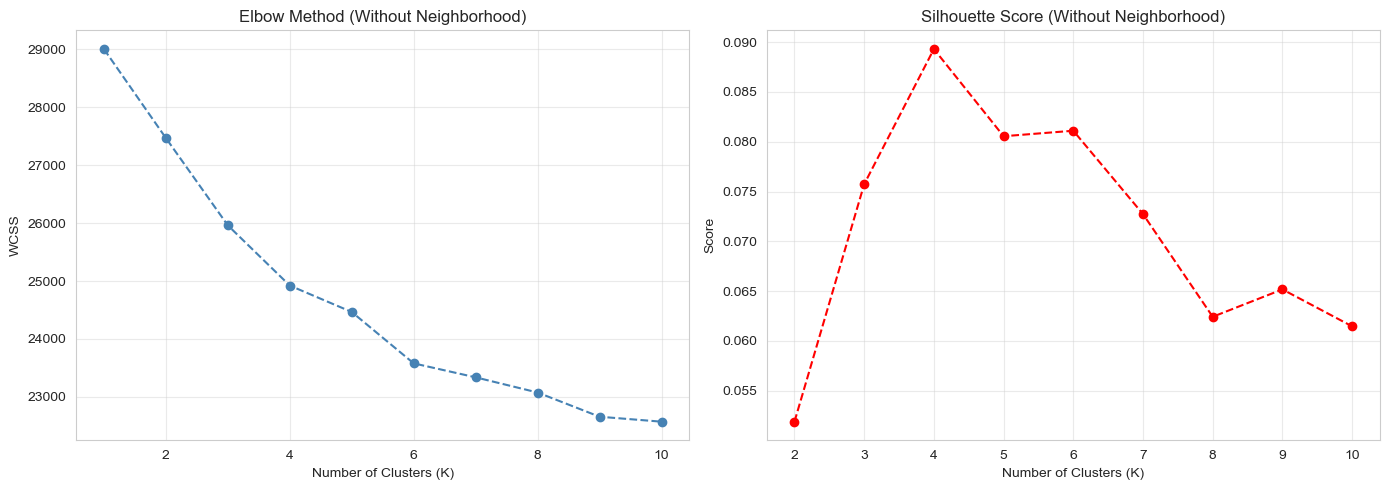

Mejor K: 4  (score: 0.0893)


In [24]:
# StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

# Elbow + Silhouette
wcss = []
sil_scores = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, labels))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, 11), wcss, marker='o', linestyle='--', color='steelblue')
axes[0].set_title('Elbow Method (Without Neighborhood)')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('WCSS')
axes[0].grid(alpha=0.4)

axes[1].plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='red')
axes[1].set_title('Silhouette Score (Without Neighborhood)')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Score')
axes[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()

# Best K / Mejor K
best_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f"Best K / Mejor K: {best_k}  (score: {max(sil_scores):.4f})")


In [25]:
# Train with K=4 / Entrenamiento con K=4
kmeans_final = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
df['Cluster_NoNeighborhood'] = kmeans_final.fit_predict(scaled_data)

# Distribution / Distribución
print("=== Distribution K=4 / Distribución K=4 ===")
print(df['Cluster_NoNeighborhood'].value_counts().sort_index())
print()

# Analysis by cluster / Análisis por cluster
analisis = df.groupby('Cluster_NoNeighborhood').agg({
    'Price (£)': ['mean', 'median'],
    'Square Meters': 'mean',
    'Bedrooms': 'mean',
    'Bathrooms': 'mean',
    'Building Age': 'mean',
    'Floors': 'mean'
}).round(0)

print(analisis)


=== Distribución K=4 ===
Cluster_NoNeighborhood
0    243
1    264
2    258
3    235
Name: count, dtype: int64

                        Price (£)            Square Meters Bedrooms Bathrooms  \
                             mean     median          mean     mean      mean   
Cluster_NoNeighborhood                                                          
0                       1770287.0  1620000.0         146.0      3.0       2.0   
1                       1937941.0  1825000.0         153.0      3.0       2.0   
2                       1830937.0  1694600.0         148.0      3.0       2.0   
3                       1815444.0  1683000.0         152.0      3.0       2.0   

                       Building Age Floors  
                               mean   mean  
Cluster_NoNeighborhood                      
0                              52.0    2.0  
1                              49.0    2.0  
2                              49.0    2.0  
3                              50.0    2.0  


C:\Users\se_ba\anaconda3\envs\PyTorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [26]:
print(pd.crosstab(df['Cluster_NoNeighborhood'], df['Neighborhood']))

Neighborhood            Camden  Chelsea  Greenwich  Islington  Kensington  \
Cluster_NoNeighborhood                                                      
0                           27       21         19         20          30   
1                           22       25         26         25          31   
2                           23       28         26         25          30   
3                           34       20         26         27          23   

Neighborhood            Marylebone  Notting Hill  Shoreditch  Soho  \
Cluster_NoNeighborhood                                               
0                               28            26          26    26   
1                               39            24          16    28   
2                               21            30          26    20   
3                               25            16          21    22   

Neighborhood            Westminster  
Cluster_NoNeighborhood               
0                                20  
1 

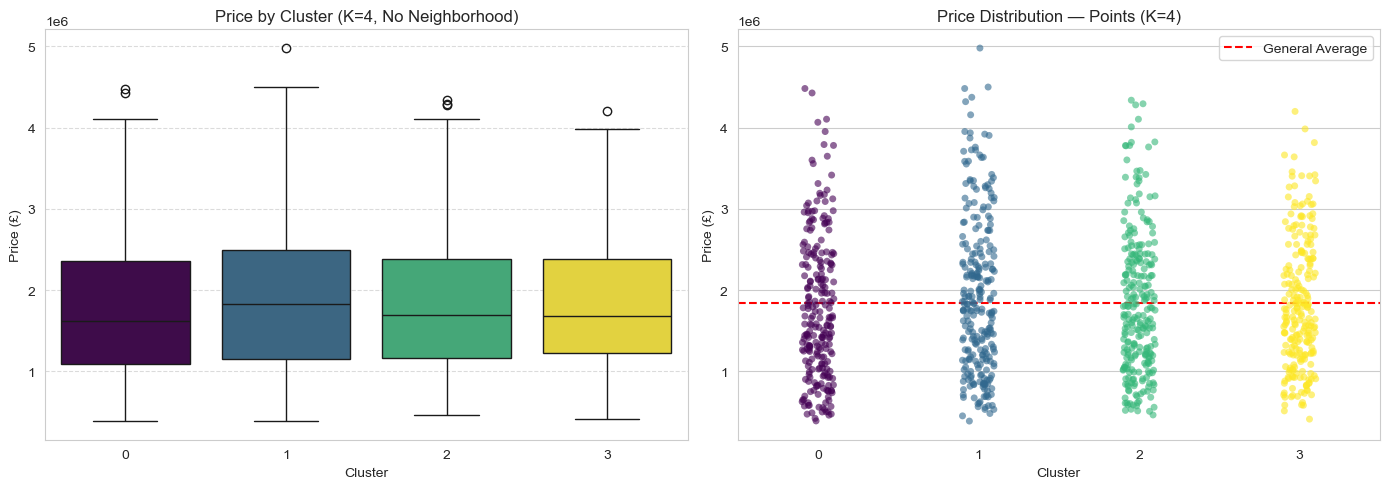

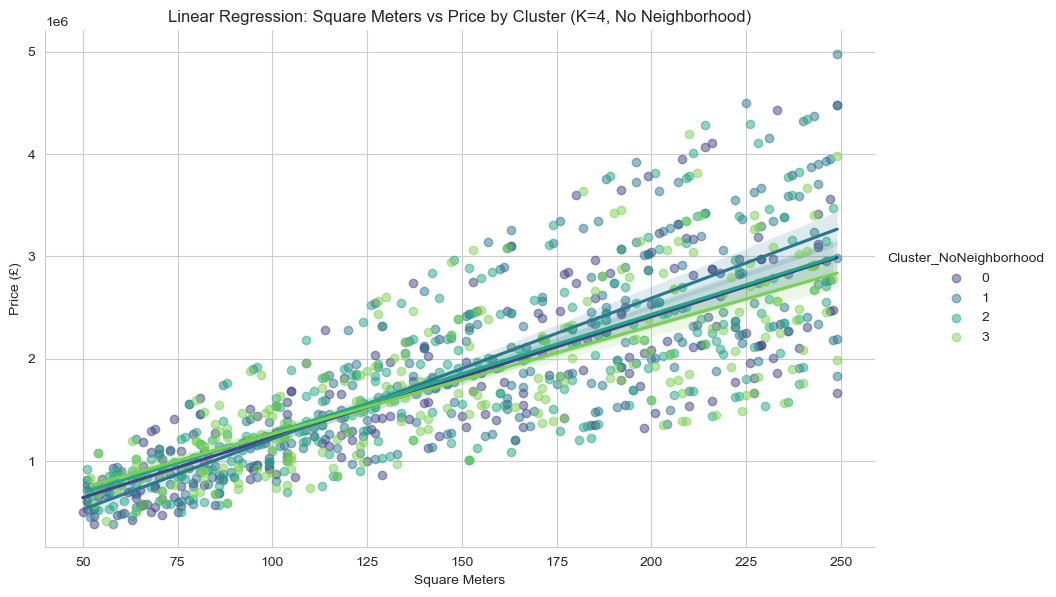

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(x='Cluster_NoNeighborhood', y='Price (£)', 
            hue='Cluster_NoNeighborhood', legend=False,
            data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Price by Cluster (K=4, No Neighborhood)')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Price (£)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Stripplot
sns.stripplot(x='Cluster_NoNeighborhood', y='Price (£)', 
              hue='Cluster_NoNeighborhood', legend=False,
              data=df, jitter=True, palette='viridis', alpha=0.6, ax=axes[1])
axes[1].axhline(df['Price (£)'].mean(), color='red', linestyle='--', label='General Average')
axes[1].set_title('Price Distribution — Points (K=4)')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Price (£)')
axes[1].legend()

plt.tight_layout()
plt.show()

# lmplot aparte
sns.set_style("whitegrid")
g = sns.lmplot(
    data=df,
    x="Square Meters", 
    y="Price (£)", 
    hue="Cluster_NoNeighborhood", 
    palette="viridis",
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha':0.5}
)
g.set_axis_labels("Square Meters", "Price (£)")
plt.title("Linear Regression: Square Meters vs Price by Cluster (K=4, No Neighborhood)")
plt.show()

In [30]:
from scipy import stats

# Separate prices by cluster / Separar precios por cluster
grupos_k10 = [df[df['Cluster_10'] == k]['Price (£)'] for k in range(10)]
grupos_k4  = [df[df['Cluster_NoNeighborhood'] == k]['Price (£)'] for k in range(4)]

# ANOVA
f_k10, p_k10 = stats.f_oneway(*grupos_k10)
f_k4,  p_k4  = stats.f_oneway(*grupos_k4)

print("=== ANOVA K=10 (With Neighborhood / Con Neighborhood) ===")
print(f"F-statistic: {f_k10:.4f}")
print(f"P-value:     {p_k10:.6f}")
print()
print("=== ANOVA K=4 (Without Neighborhood / Sin Neighborhood) ===")
print(f"F-statistic: {f_k4:.4f}")
print(f"P-value:     {p_k4:.6f}")


=== ANOVA K=10 (Con Neighborhood) ===
F-statistic: 26.3550
P-value:     0.000000

=== ANOVA K=4 (Sin Neighborhood) ===
F-statistic: 1.6741
P-value:     0.170911


The **F-statistic** measures how different the groups are from each other. The **p-value** tells us whether that difference is real or accidental.  
El **F-statistic** mide qué tan distintos son los grupos entre sí. El **p-value** nos dice si esa diferencia es real o accidental.

```
p < 0.05 → statistically significant difference / diferencia estadísticamente significativa ✅
p > 0.05 → not significant, may be noise / no significativa, puede ser ruido ❌
```


---

## ANOVA — Analysis of Variance / Análisis de Varianza

ANOVA responde una pregunta simple / ANOVA answers a simple question:
**¿Las diferencias entre grupos son reales o son solo ruido?**
**Are the differences between groups real or just noise?**

---

### How it works / Cómo funciona

ANOVA compara dos tipos de variación / ANOVA compares two types of variation:

**1. Variación ENTRE grupos / Variation BETWEEN groups**
¿Qué tan diferentes son los promedios de cada cluster?
How different are the averages of each cluster?

| | K=10 (Con Neighborhood) | K=4 (Sin Neighborhood) |
|---|---|---|
| Cluster más caro / Most expensive | £2,452,894 (Chelsea) | £1,937,941 (Cluster 1) |
| Cluster más barato / Cheapest | £1,269,409 (Greenwich) | £1,770,287 (Cluster 0) |
| **Diferencia / Difference** | **£1,183,485 ← grande / large** | **£167,654 ← pequeña / small** |

**2. Variación DENTRO de cada grupo / Variation WITHIN each group**
¿Qué tan dispersos están los precios dentro de un mismo cluster?
How spread are the prices within the same cluster?
```
Dentro de cada cluster hay casas desde £386,000 hasta £4,980,000
Within each cluster there are houses from £386,000 to £4,980,000
→ variación interna muy grande en ambos casos / large internal variation in both cases
```

---

### F-Statistic 
$$(English)$$

$$F = \frac{\text{Variation BETWEEN groups}}{\text{Variation WITHIN groups}}$$

$$(Spanish/Español)$$

$$F = \frac{\text{Variación ENTRE grupos}}{\text{Variación DENTRO de grupos}}$$

| | F-Statistic | Interpretación / Interpretation |
|---|---|---|
| K=10 | 26.35 | Variación entre grupos es 26x mayor que la interna ✅ |
| K=4  | 1.67  | Variación entre grupos es apenas 1.67x mayor ❌ |

> Si F es grande → los grupos son genuinamente distintos / groups are genuinely different.
> Si F ≈ 1 → los grupos se parecen tanto como el ruido interno / groups resemble internal noise.

---

### P-Value

El P-value traduce el F-statistic a probabilidad de que las diferencias sean casualidad.
The P-value translates the F-statistic into the probability that differences are due to chance.

| | P-Value | Conclusión / Conclusion |
|---|---|---|
| K=10 | 0.000000 | 0% probabilidad de casualidad / 0% chance ✅ |
| K=4  | 0.1709   | 17% probabilidad de casualidad / 17% chance ❌ |

> Umbral estándar / Standard threshold: **p < 0.05**
> Con p = 0.1709 no podemos afirmar que los clusters sean reales.
> With p = 0.1709 we cannot confirm that the clusters are real.

---

### Resumen Final / Final Summary

| | K=10 Con Neighborhood | K=4 Sin Neighborhood |
|---|---|---|
| Silhouette Score | 0.1402 | 0.0893 |
| F-Statistic | 26.35 | 1.67 |
| P-Value | 0.000000 ✅ | 0.170911 ❌ |
| Conclusión | Clusters = Barrios / Neighborhoods | Sin estructura real / No real structure |

> **K=10** → Las diferencias de precio entre barrios (£1.1M) son tan grandes
> que el ruido interno no las explica → **REAL pero trivial / REAL but trivial**
>
> **K=4** → Las diferencias entre clusters (£167K) son tan pequeñas
> comparadas con el ruido interno → **ARTIFICIAL**
>
---

# Houses in London — Final Report / Reporte Final
## KMeans Clustering Analysis — Unsupervised Learning Exercise
---

## 1. Dataset Overview / Descripción del Dataset

| | |
|---|---|
| **Rows / Filas** | 1,000 |
| **Columns / Columnas** | 17 |
| **Null values / Valores nulos** | 0 |
| **Target variable / Variable objetivo** | Price (£) |
| **Source / Fuente** | [Kaggle](https://www.kaggle.com/datasets/oktayrdeki/houses-in-london) |

El dataset no tiene valores nulos — ideal para clustering.
The dataset has no null values — ideal for clustering.

---

## 2. Preprocessing / Preprocesamiento

| Column / Columna | Treatment / Tratamiento | Reason / Razón |
|---|---|---|
| `Address` | Drop | Unique text identifier / Identificador único de texto |
| `Price (£)` | Drop (saved separately) | Target variable / Variable objetivo |
| `Garden`, `Garage` | Binary map → 0/1 | Genuine Yes/No / Genuinamente binarias |
| `Balcony` | Ordinal → 0, 1, 2 | Has order: None < Low < High / Tiene orden |
| `Building Status` | Ordinal → 0, 1, 2 | Has order: Old < Renovated < New / Tiene orden |
| `Neighborhood`, `Property Type`, `Heating Type`, `Interior Style`, `View`, `Materials` | One-Hot Encoding | Nominal — no order / Sin orden |

> ⚠️ **Bug corregido / Bug fixed:** En el notebook original `Balcony` fue mapeada como binaria (Yes/No), generando NaN en toda la columna. Sus valores reales eran `No Balcony`, `Low-level Balcony`, `High-level Balcony` — fue corregida como variable ordinal.
>
> In the original notebook `Balcony` was mapped as binary (Yes/No), generating NaN across the entire column. Its real values were `No Balcony`, `Low-level Balcony`, `High-level Balcony` — corrected as an ordinal variable.

**StandardScaler applied / StandardScaler aplicado:**

$$z = \frac{x - \mu}{\sigma}$$

- Mean / Media: `≈ 0.0` ✅
- Std / Desviación estándar: `≈ 1.0` ✅

---

## 3. Silhouette Score — Interpretation Scale / Escala de Interpretación

| Score | Español | English |
|-------|---------|---------|
| 0.71 – 1.00 | Clusters perfectamente separados | Perfectly separated clusters |
| 0.51 – 0.70 | Estructura razonable | Reasonable structure |
| 0.26 – 0.50 | Estructura débil, clusters se solapan | Weak structure, overlapping clusters |
| < 0.25 | Sin estructura clara, clusters artificiales | No clear structure, artificial clusters |

---

## 4. Phase 1 — With Neighborhood / Fase 1 — Con Neighborhood

**Shape:** `(1000, 39)` — 10 columnas OHE para Neighborhood / 10 OHE columns for Neighborhood

### Finding K / Encontrando K

| Method / Método | Result / Resultado |
|---|---|
| Elbow Method | No clear elbow / Sin codo claro |
| `KneeLocator` | `None` |
| Silhouette Score | Maximum at K=10 (score: 0.14) / Máximo en K=10 (score: 0.14) |

### Cluster Distribution / Distribución de Clusters

#### K=5 ❌ Unbalanced / Desbalanceado

| Cluster | Houses / Casas | Ideal | Difference / Diferencia |
|---------|---------------|-------|------------------------|
| 0 | 292 | 200 | +92 |
| 1 | 113 | 200 | -87 |
| 2 | 385 | 200 | +185 ⚠️ |
| 3 | 114 | 200 | -86 |
| 4 |  96 | 200 | -104 |

> ❌ Cluster 2 absorbs 38% of all houses / El cluster 2 absorbe el 38% del total.

#### K=10 ✅ Balanced / Balanceado

| Cluster | Houses / Casas | Ideal | Difference / Diferencia |
|---------|---------------|-------|------------------------|
| 0 |  94 | 100 | -6  |
| 1 | 106 | 100 | +6  |
| 2 |  96 | 100 | -4  |
| 3 |  89 | 100 | -11 |
| 4 |  96 | 100 | -4  |
| 5 |  97 | 100 | -3  |
| 6 |  97 | 100 | -3  |
| 7 |  98 | 100 | -2  |
| 8 | 114 | 100 | +14 |
| 9 | 113 | 100 | +13 |

> ✅ All clusters close to the ideal of 100 / Todos los clusters cerca del ideal de 100.

### Key Finding / Hallazgo Clave — Clusters = Neighborhoods / Vecindarios

| Cluster | Neighborhood | Houses / Casas | Avg Price / Precio Promedio (£) |
|---------|-------------|---------------|-------------------------------|
| 0 | Chelsea | 94 | 2,452,894 |
| 1 | Camden | 106 | 1,626,332 |
| 2 | Notting Hill | 96 | 1,957,589 |
| 3 | Shoreditch | 89 | 1,332,829 |
| 4 | Soho | 96 | 1,781,121 |
| 5 | Islington | 97 | 1,507,373 |
| 6 | Greenwich | 97 | 1,269,409 |
| 7 | Westminster | 98 | 2,291,437 |
| 8 | Kensington | 114 | 2,282,233 |
| 9 | Marylebone | 113 | 1,824,982 |

> 🚨 **Separación perfecta / Perfect separation — 0 casas mezcladas entre barrios / 0 houses mixed between neighborhoods.**

El One-Hot Encoding generó 10 columnas para `Neighborhood` — dándole un peso colectivo excesivo sobre todas las demás variables. KMeans no descubrió patrones ocultos; simplemente replicó la columna `Neighborhood` ya existente.

One-Hot Encoding generated 10 columns for `Neighborhood` — giving it excessive collective weight over all other variables. KMeans did not discover hidden patterns; it simply replicated the existing `Neighborhood` column.

**Esto tiene nombre: Data Leakage Conceptual / This has a name: Conceptual Data Leakage.**

---

## 5. Phase 2 — Without Neighborhood / Fase 2 — Sin Neighborhood

**Shape:** `(1000, 29)` — 10 columnas menos / 10 fewer columns

### Finding K / Encontrando K

| Method / Método | Result / Resultado |
|---|---|
| Elbow Method | No clear elbow / Sin codo claro |
| Silhouette Score | Maximum at K=4 (score: 0.0893) / Máximo en K=4 (score: 0.0893) |

> El score **bajó** de 0.14 a 0.09 — las variables físicas tienen menos estructura que el vecindario.
> The score **dropped** from 0.14 to 0.09 — physical variables have less structure than neighborhood.

### Cluster Analysis K=4 / Análisis de Clusters K=4

| Cluster | Houses / Casas | Avg Price (£) | Avg m² | Bedrooms | Bathrooms | Building Age |
|---------|---------------|---------------|--------|----------|-----------|--------------|
| 0 | 243 | 1,770,287 | 146 | 3 | 2 | 52 |
| 1 | 264 | 1,937,941 | 153 | 3 | 2 | 49 |
| 2 | 258 | 1,830,937 | 148 | 3 | 2 | 49 |
| 3 | 235 | 1,815,444 | 152 | 3 | 2 | 50 |

> ❌ Todas las variables físicas son prácticamente idénticas entre clusters.
> All physical variables are practically identical across clusters.

---

## 6. ANOVA — Statistical Validation / Validación Estadística

$$F = \frac{\text{Variación ENTRE grupos}}{\text{Variación DENTRO de grupos}}$$

| | K=10 Con Neighborhood | K=4 Sin Neighborhood |
|---|---|---|
| F-Statistic | 26.35 | 1.67 |
| P-Value | 0.000000 ✅ | 0.170911 ❌ |
| Conclusión | Diferencia real / Real difference | Ruido estadístico / Statistical noise |

> Umbral estándar / Standard threshold: **p < 0.05**
>
> **K=10** → p = 0.000000 — diferencias de precio entre barrios (£1.18M) son reales y significativas. Pero son triviales porque KMeans solo replicó Neighborhood.
>
> **K=4** → p = 0.1709 — 17% de probabilidad de que las diferencias sean casualidad. Los clusters no son estadísticamente válidos.

---

## 7. Comparative Summary / Resumen Comparativo

| | Phase 1 / Fase 1 | Phase 2 / Fase 2 |
|---|---|---|
| Neighborhood included / incluido | ✅ Sí | ❌ No |
| Shape | (1000, 39) | (1000, 29) |
| Optimal K / K óptimo | 10 | 4 |
| Silhouette Score | 0.1402 | 0.0893 |
| F-Statistic (ANOVA) | 26.35 | 1.67 |
| P-Value (ANOVA) | 0.000000 ✅ | 0.170911 ❌ |
| lmplot pattern | 10 parallel lines / 10 líneas paralelas | 4 parallel lines overlapping / 4 líneas superpuestas |
| Clusters represent / representan | Neighborhoods / Vecindarios | Nothing real / Nada real |

---

## 8. Dataset Quality Diagnosis / Diagnóstico de Calidad del Dataset

| Indicator / Indicador | Value / Valor | Interpretation / Interpretación |
|---|---|---|
| Null values / Nulos | 0 | ✅ Clean / Limpio |
| Neighborhood std | 8.25 | ⚠️ Near uniform / Casi uniforme |
| Silhouette (Phase 1) | 0.14 | ❌ No natural clusters |
| Silhouette (Phase 2) | 0.09 | ❌ No natural clusters |
| Physical features vs Price | No correlation / Sin correlación | ⚠️ Synthetic data / Datos sintéticos |

> Una distribución real de Londres mostraría variaciones extremas entre barrios (Kensington podría tener 300 propiedades y Greenwich 50). Una std de 8.25 sobre una media de 100 es demasiado uniforme para ser real — el dataset fue **generado sintéticamente**.
>
> A real London distribution would show extreme variations between neighborhoods (Kensington could have 300 properties and Greenwich 50). A std of 8.25 over a mean of 100 is too uniform to be real — the dataset was **synthetically generated**.

---

## 9. Final Conclusions / Conclusiones Finales

El análisis en dos fases reveló que KMeans no fue capaz de descubrir segmentos de mercado genuinos en este dataset. Sin embargo, el ejercicio fue valioso porque demostró:

The two-phase analysis revealed that KMeans was unable to discover genuine market segments in this dataset. However, the exercise was valuable because it demonstrated:

**1. Preprocesamiento importa / Preprocessing matters**
El bug en Balcony y el peso excesivo de Neighborhood cambiaron completamente los resultados.
The Balcony bug and the excessive weight of Neighborhood completely changed the results.

**2. Data Leakage Conceptual**
Incluir una variable tan dominante como Neighborhood le quitó al modelo cualquier oportunidad de encontrar patrones reales.
Including a variable as dominant as Neighborhood removed any opportunity for the model to find real patterns.

**3. Datos sintéticos son limitantes / Synthetic data is limiting**
Un Silhouette Score de 0.14 y p-values no significativos sin Neighborhood confirman que el dataset no tiene estructura real para descubrir.
A Silhouette Score of 0.14 and non-significant p-values without Neighborhood confirm the dataset has no real structure to discover.

**4. El fracaso también enseña / Failure also teaches**
Diagnosticar por qué un modelo no funciona es una habilidad fundamental en data science.
Diagnosing why a model fails is a fundamental skill in data science.

---

> *"KMeans no falló — los datos no tenían nada que descubrir."*
> *"KMeans did not fail — the data had nothing to discover."*

---
*Houses in London — Unsupervised Learning Exercise | Complete Report*
*Sebastian — 2025*